importing all required library

for the Handwritten Digit Recognition i have used mnist dataset. and dataset has resolution of 28 *28 pexels. i normalized all the pexels in same scale .
i have created cnn model of 3 layer of convolution layers. and used stratifiedkfold cross validation technique due evaluate model performace.



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define the CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True)
val_accuracies = []
val_losses = []

for train_index, val_index in skf.split(train_images, np.argmax(train_labels, axis=1)):
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Create the model
    model = create_model()

    # Define callbacks
    early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
    checkpoint_path = 'best_model.h5'
    model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val),
                        callbacks=[early_stopping, model_checkpoint])

    # Evaluate the model
    val_loss, val_acc = model.evaluate(X_val, y_val)
    val_accuracies.append(val_acc)
    val_losses.append(val_loss)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Calculate mean and standard deviation of validation metrics
print(f'Mean Validation Accuracy: {np.mean(val_accuracies):.4f} ± {np.std(val_accuracies):.4f}')
print(f'Mean Validation Loss: {np.mean(val_losses):.4f} ± {np.std(val_losses):.4f}')


11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/10
750/750 [==============================] - 19s 24ms/step - loss: 0.2012 - accuracy: 0.9382 - val_loss: 0.0603 - val_accuracy: 0.9818
Epoch 2/10
  7/750 [..............................] - ETA: 16s - loss: 0.0722 - accuracy: 0.9754

d:\Newfolder\1004646\Anaconda3\envs\googlescrapper\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 15s 20ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.0492 - val_accuracy: 0.9856
Epoch 3/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0344 - val_accuracy: 0.9892
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 5/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0344 - accuracy: 0.9892
Epoch 1/10
750/750 [==============================] - 17s 22ms/step - loss: 0.2116 - accuracy: 0.9361 - val_loss: 0.0925 - val_accuracy: 0.9720
Epoch 2/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0490 - val_accuracy: 0.9847
Epoch 3/10
750/750 [===========================

overall the model i have created performing well, i got validation accuracy of 0.98 and tes accuracy of 0.99

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

313/313 [==============================] - 2s 7ms/step


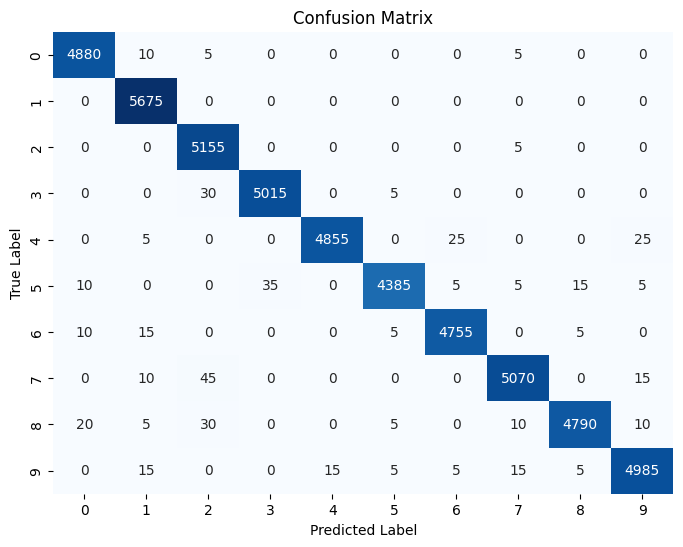

In [3]:
# Create lists to store predictions and ground truths
predicted_labels = []
true_labels = []

for train_index, val_index in skf.split(train_images, np.argmax(train_labels, axis=1)):
    # (same training loop and model fitting code as provided earlier)

    # Load the best model
    best_model = tf.keras.models.load_model(checkpoint_path)

    # Predict on the test set using the best model
    predictions = best_model.predict(test_images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(np.argmax(test_labels, axis=1))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Based on confusion matrics model is performing very good.

but when i try this model i observed some times it fails to predict correct class. still there is room for imrovement by adding new variety of dataset we can achive still better result